In this notebook, 

In [ ]:
%matplotlib notebook

In [19]:
import matplotlib.pyplot as plt
import numpy as np 

import sys
import os 

In [ ]:
plt.ioff()

Have to set recursion limit 

In [ ]:
sys.setrecursionlimit(10000) 

import two functions from our module (simulation.py)

In [5]:
from simulation import genParticles, leapfrog

simulation free parameters

In [34]:
L = 2
rand_type = 2
sig= 0.1
mu = 0.05
N = 25
theta = 0.5
epsilon = 1e-3
m_scale = 1e3 

particle_path=None # './data/example/particles.csv'
store=True

generate and visulize particles 

Particle data generated via normal distribution with the following parameters: 
sigma = 0.1; mu = 0.05.


<IPython.core.display.Javascript object>


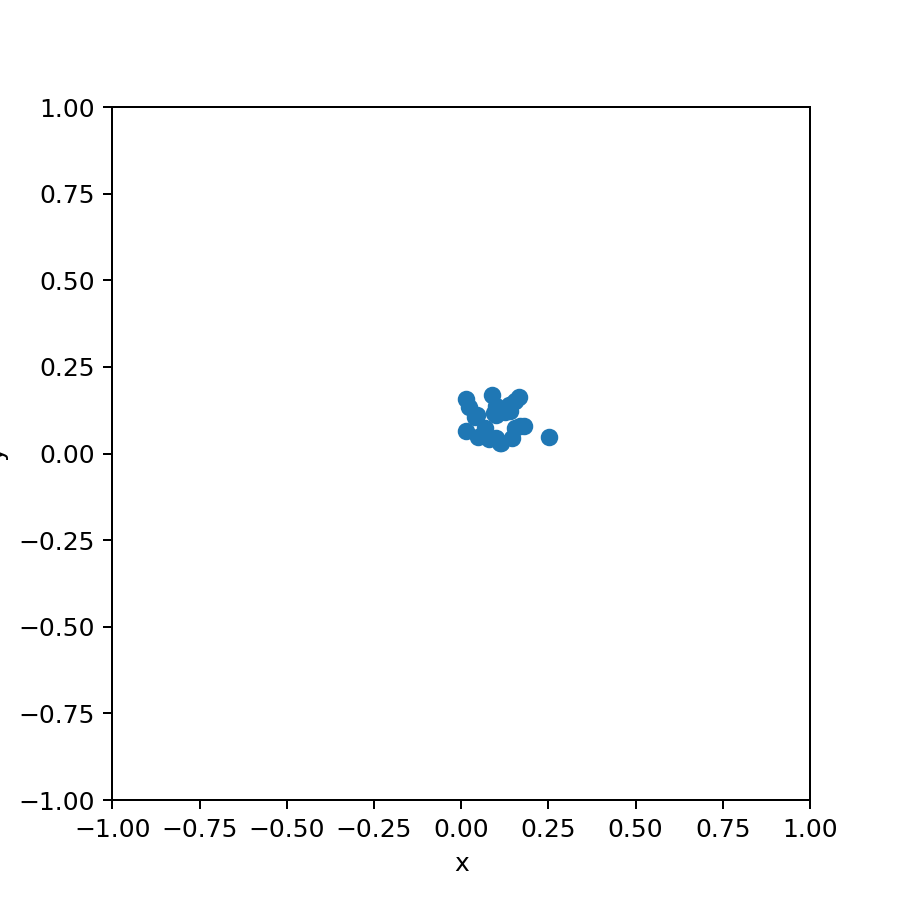

In [35]:
if particle_path is None: 
    if rand_type == 1: 
        print('Particle data generated via uniform distribution.')
    elif rand_type == 2: 
        print('Particle data generated via normal distribution with the following parameters: \nsigma = {}; mu = {}.'.format(sig, mu))
    particles = genParticles(rand_type, mu=mu, sig=sig, L=L, N=N)
else: 
    print('Particle data read from the following directory: {}'.format(particle_path))
    particles = np.loadtxt(particle_path)
    
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(particles[:, 0], particles[:, 1])
ax.set_xlim(-L/2, L/2)
ax.set_ylim(-L/2, L/2)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

run simulation

In [28]:
if store:
    storedir = 'L{}n{}'.format(L, N)
    storedir = './data/{}'.format(storedir)

    if not os.path.isdir(storedir):
        os.mkdir(storedir)
            
print('Simulation running with the following parameters:') 
print('L = {}; N = {}; theta = {}; softening = {}; M_scale = {}.'.format(L, N, theta, epsilon, m_scale))
if store:
    print('Particle data will be stored in {}\n'.format(storedir)) 

leapfrog(particles, L=L, theta=theta, epsilon=epsilon, m_scale=m_scale, store=store, path=storedir)

Simulation running with the following parameters:
L = 1.0; N = 4; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L1.0n4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1390.22it/s]


0

Can also do via command line ...

In [21]:
%run simulation.py


Simulation running with the following parameters:
L = 1; N = 3; theta = 0.5; softening = 0.001; M_scale = 1000.0.
Particle data generated via normal distribution with the following parameters: sigma = 0.1; mu = 0.1.
Particle data will be stored in ./data/L1n3



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 2021.50it/s]


Using non-fiducial parameters

In [25]:
%run simulation.py -L 1 -opening_angle 0.2 -softening 1e-2 -N 4 -rand_type 2 0.2 0.3 --store

Particle data generated via normal distribution with the following parameters: 
sigma = 0.2; mu = 0.3.
Simulation running with the following parameters:
L = 1.0; N = 4; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L1.0n4



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:01<00:00, 962.23it/s]


Can even specify input file

In [26]:
%run simulation.py -L 1 -opening_angle 0.2 -softening 1e-2 -N 4 -rand_type 0 --store -f ./data/example/particles.csv 

Particle data read from the following directory: ./data/example/particles.csv
Simulation running with the following parameters:
L = 1.0; N = 4; theta = 0.2; softening = 0.01; M_scale = 1000.0.
Particle data will be stored in ./data/L1.0n4



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 1392.92it/s]
